# Arago point


Here, we analyze in XY and XYZ framework how Arago point (also called Poisson spot) is generated

https://www.lighttrans.com/use-cases/application-use-cases/observation-of-the-poisson-spot.html



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from pprint import pprint

## XY

In [2]:
from diffractio import np, plt, um, mm, nm, degrees
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

number of processors: 8


In [3]:
from matplotlib import rcParams
rcParams['figure.dpi']=200
rcParams['font.size']=14

In [4]:
x0=np.linspace(-200*um, 200*um, 512)
y0=np.linspace(-200*um, 200*um, 512)
wavelength=532*nm

In [5]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.gauss_beam(r0=(0,0), w0=130*um, z0=0, A=1, theta=0.0)

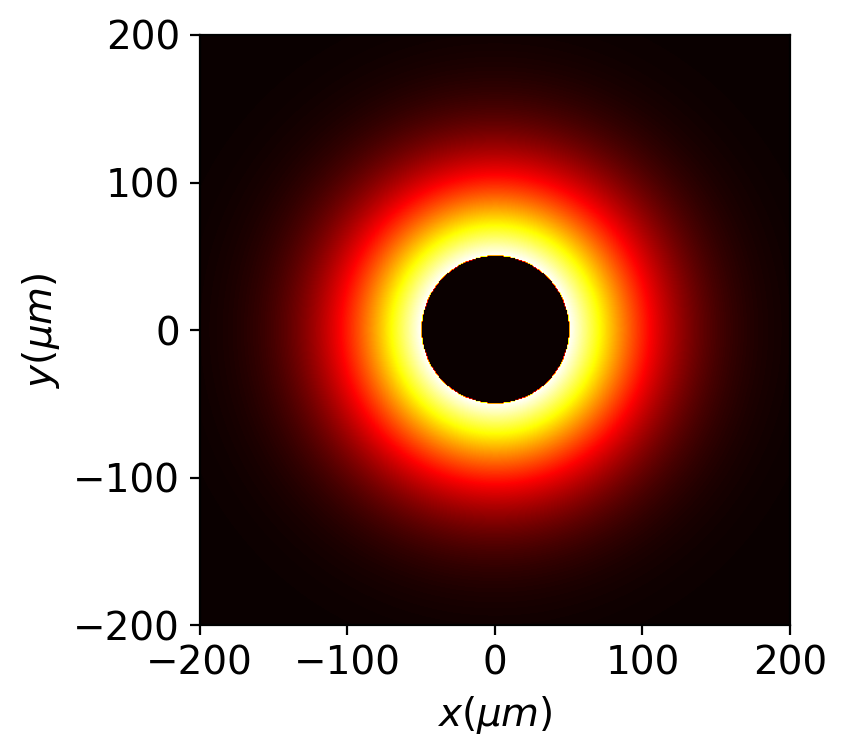

In [6]:
obstacle=Scalar_mask_XY(x0,y0,wavelength)
obstacle.circle(r0=(0,0), radius=50*um)
obstacle.u=1-obstacle.u

u1=u0*obstacle

u1.draw();

In [7]:
arago_point=u1.RS(z=2*mm)

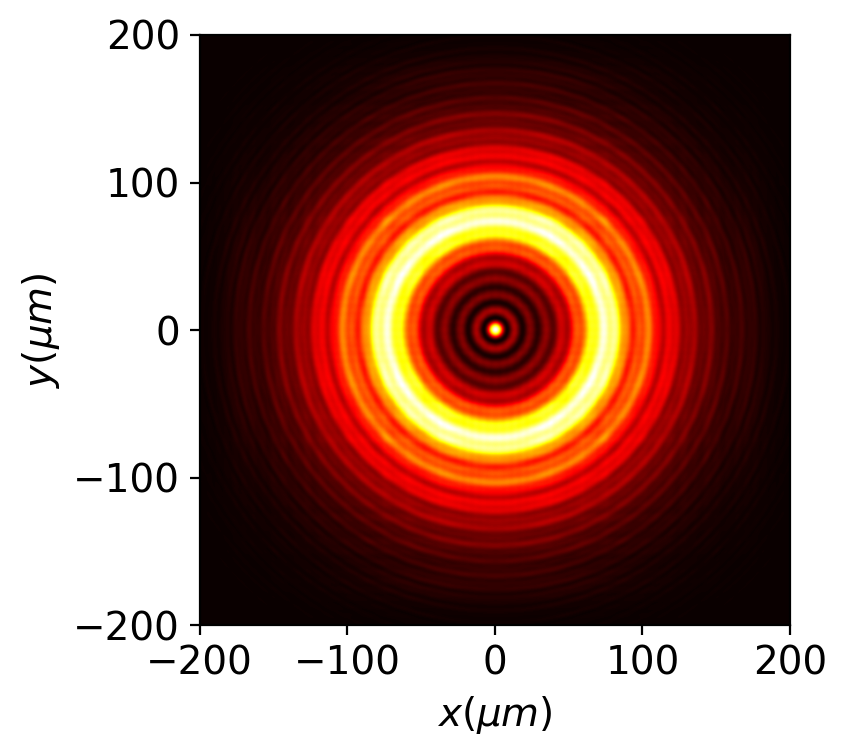

In [8]:
arago_point.draw(logarithm=True);

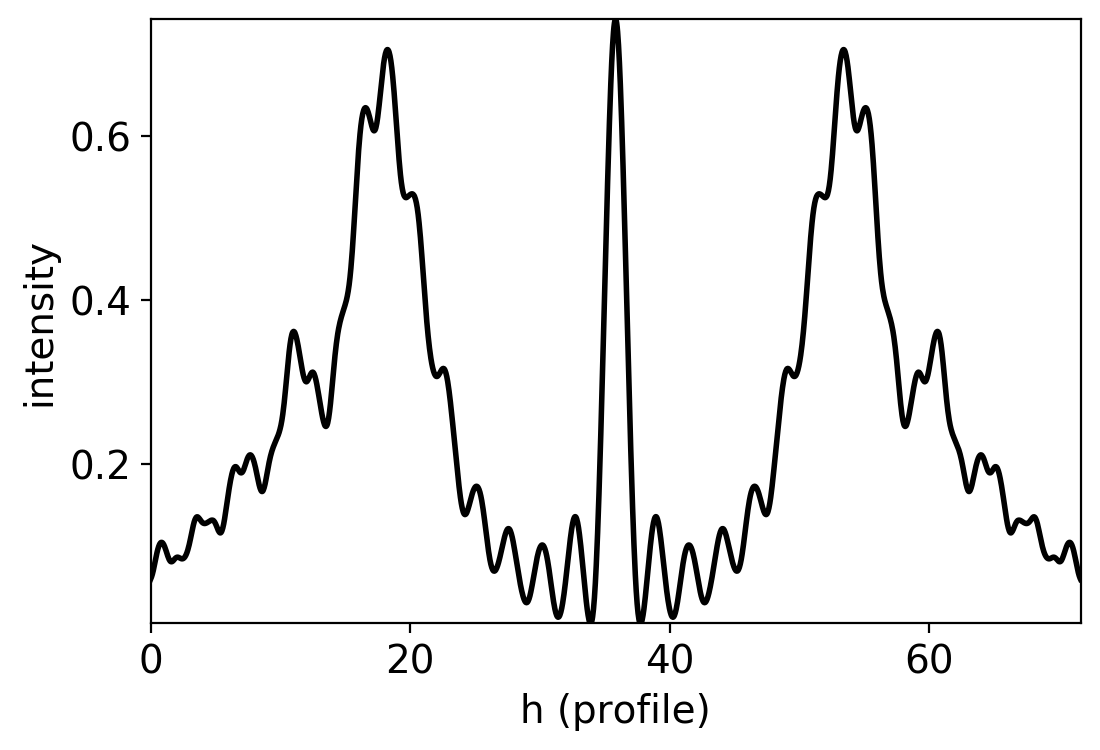

In [9]:
arago_point.draw_profile([-150,0], [150,0], npixels=2048, order=2);

## XYZ

In [1]:
from diffractio import np, plt, um, mm, nm, degrees
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY


number of processors: 8


In [2]:
from matplotlib import rcParams
rcParams['figure.dpi']=200
rcParams['font.size']=14

In [3]:
x0=np.linspace(-200*um, 200*um, 64)
y0=np.linspace(-200*um, 200*um, 64)
z0=np.linspace(1*mm, 2*mm, 64)

wavelength=532*nm

In [4]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.gauss_beam(r0=(0,0), w0=130*um, z0=0, A=1, theta=0.0)

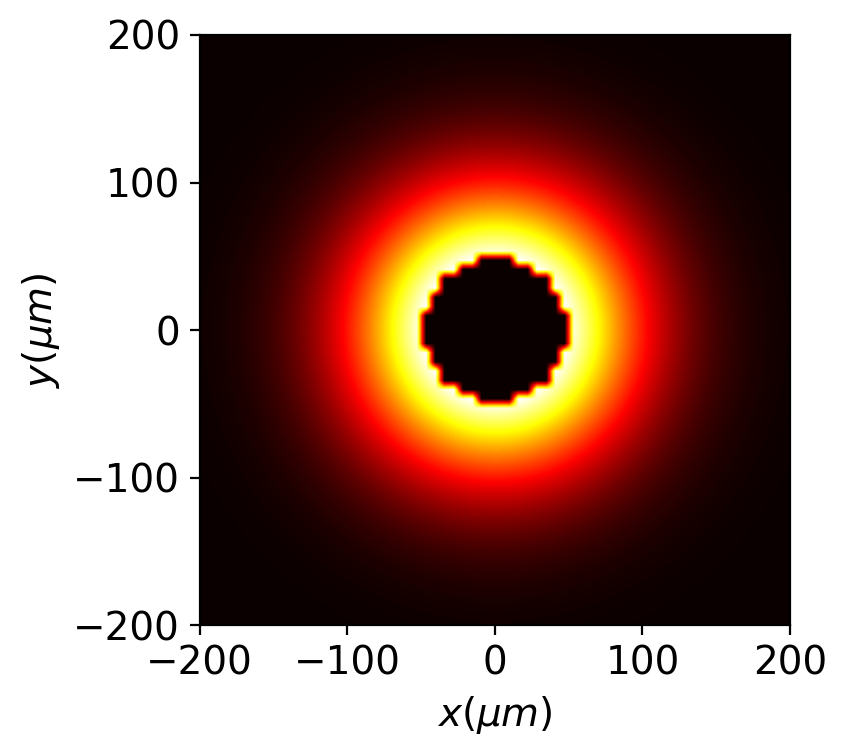

In [5]:
obstacle=Scalar_mask_XY(x0,y0,wavelength)
obstacle.circle(r0=(0,0), radius=50*um)
obstacle.u=1-obstacle.u

u1=u0*obstacle

u1.draw();

In [6]:
u_xyz=Scalar_field_XYZ(x0,y0,z0,wavelength)

In [7]:
u_xyz.incident_field(u1)

In [8]:
u_xyz.RS()

time in RS= 1.363417387008667. num proc= 6


1.363417387008667

In [9]:
%matplotlib qt

In [10]:
u_xyz.draw_intensityXYZ()

Close the window to continue.


In [11]:
u_xyz.draw_intensityXZ(y0=0)
fig=plt.gcf()
fig.set_size_inches(12,4)

In [9]:
%matplotlib qt

In [10]:
from mayavi import mlab

In [11]:
intensity=np.abs(u_xyz.u)**2
intMin = intensity.min()
intMax = intensity.max()
intensity=intensity/intMax

In [ ]:
import numpy as np
x, y, z = np.ogrid[-10:10:20j, -10:10:20j, -10:10:20j]
s = np.sin(x*y*z)/(x*y*z)


In [ ]:
mlab.figure(fgcolor=(0, 0, 0), bgcolor=(1, 1, 1))

mlab.clf()

source = mlab.pipeline.scalar_field(intensity)

mlab.pipeline.volume(
    source,
    vmin=intMin + 0.1 * (intMax - intMin),
    vmax=intMin + 0.9 * (intMax - intMin))

mlab.show()

In [27]:
mlab.view(azimuth=185, elevation=0, distance='auto')

(185.0, 0.0, 0.0, array([32.5, 32.5, 32.5]))

In [ ]:
u_xyz.drawVolumen3D()

Close the window to continue.


### Extract data from XYZ

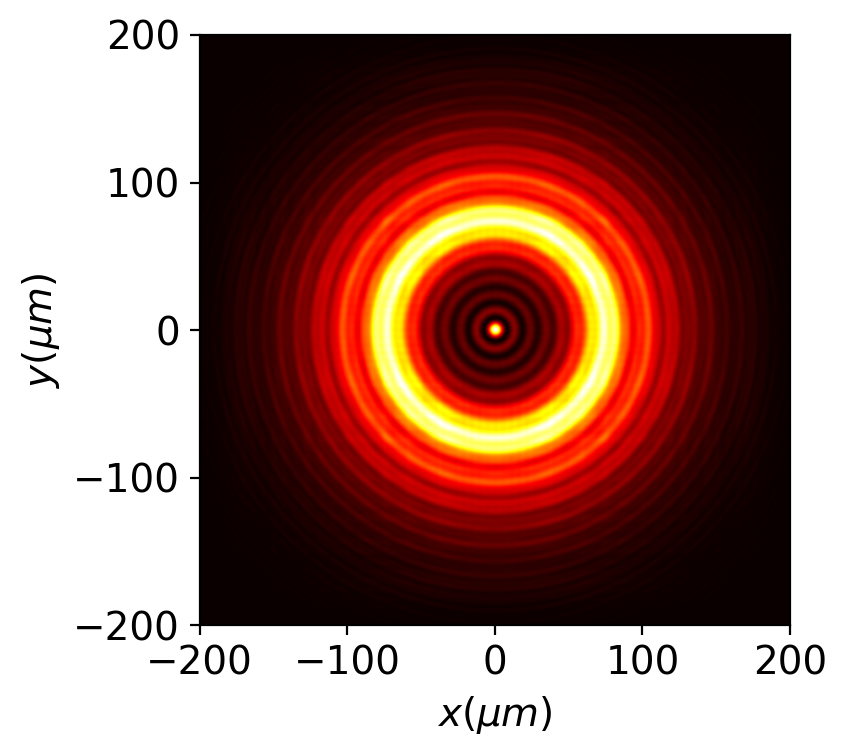

In [45]:
u_xyz.draw_intensityXY(z0=2*mm)

(<Figure size 1200x800 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f5af0305390>)

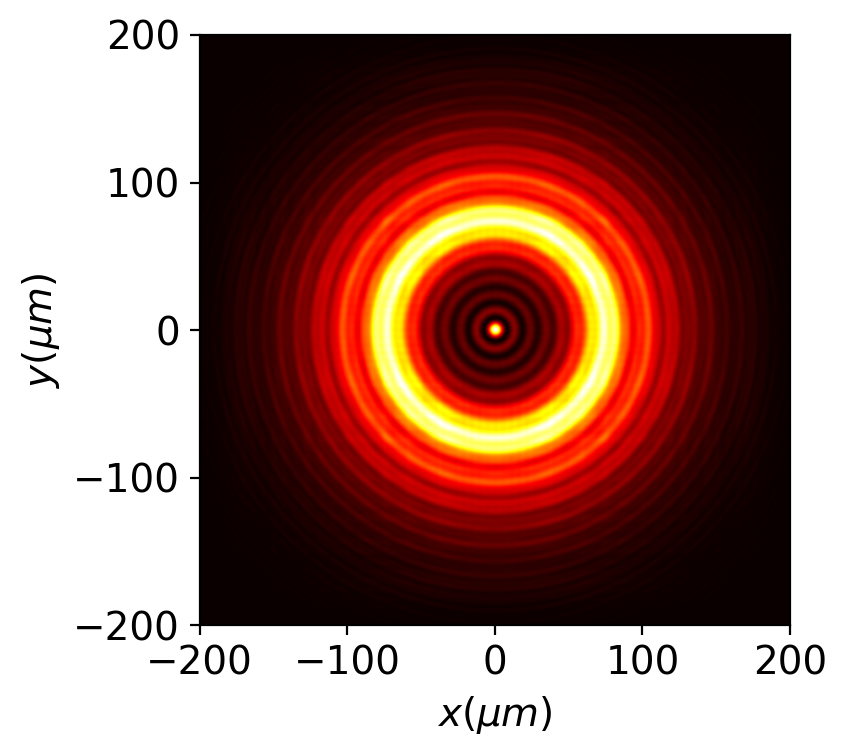

In [47]:
u_xy2=u_xyz.to_scalar_field_XY(z0=2*mm)
u_xy2.draw();

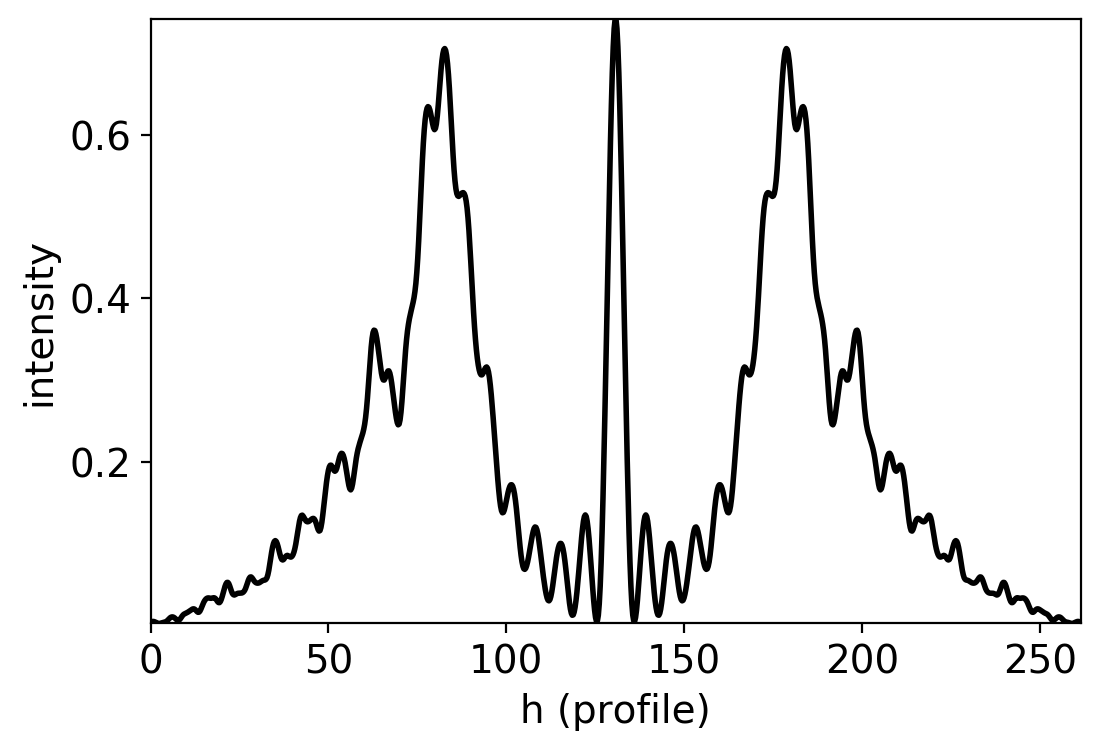

In [50]:
u_xy2.draw_profile((-200,0), (200, 0), order=2);

In [ ]:
u_xyz.

## XZ

Warning:
    For this case, that needs radial symmetry. The XZ results are not valid.

In [19]:
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

In [20]:
x0=np.linspace(-150*um, 150*um, 1024)
z0=np.linspace(100*um, 2*mm, 512)
wavelength=532*nm

In [21]:
source_x=Scalar_source_X(x0,wavelength)
source_x.gauss_beam(x0=0, w0=100*um, z0=0, A=1, theta=0.0)

In [22]:
mask_x=Scalar_mask_X(x0,wavelength)
mask_x.slit(x0=0, size=100 * um);
mask_x.u=1-mask_x.u

In [23]:
u1=source_x*mask_x

In [24]:
arago_xz=Scalar_mask_XZ(x0,z0,wavelength)
arago_xz.incident_field(u1)

In [25]:
arago_xz.RS();

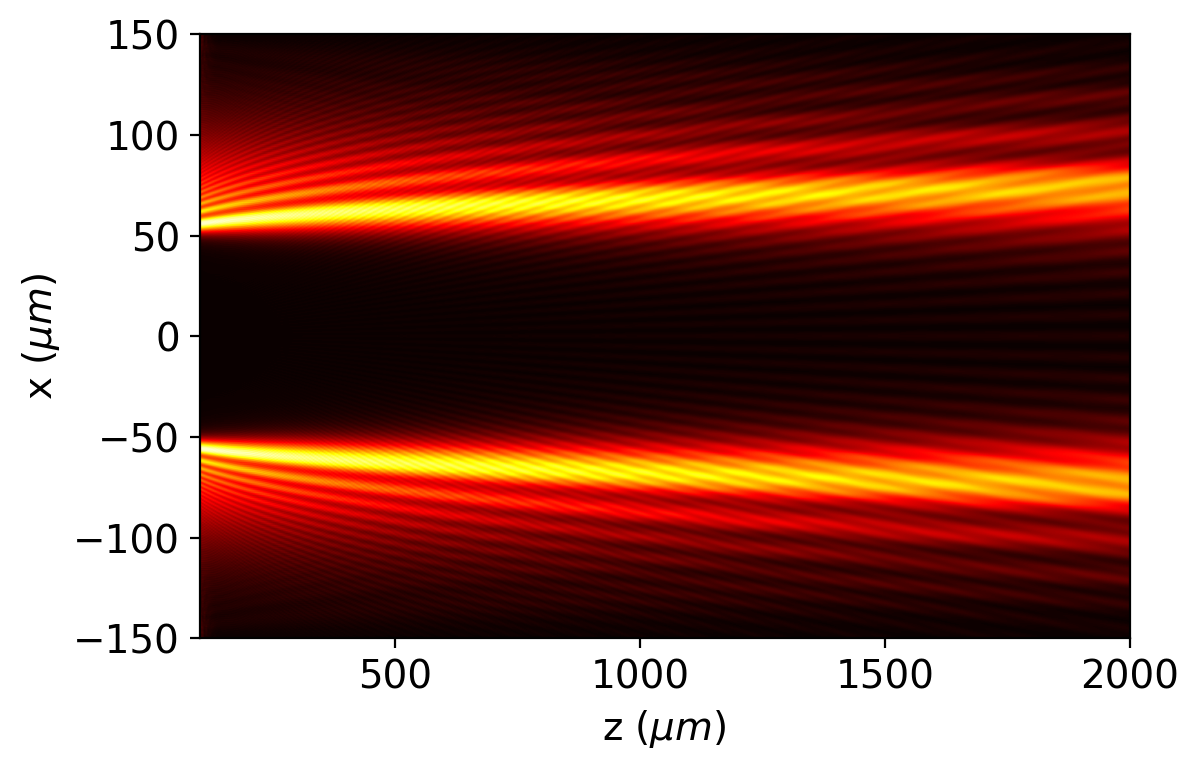

In [41]:
arago_xz.draw()